## Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv("TransformedData.csv", parse_dates=True)
df

,Longitude,Latitude,Width,Length,Area,Floors,Rooms,Toilets,Price,1 Part Residential,...,House Direction_NORTHEAST,House Direction_NORTHWEST,House Direction_SOUTH,House Direction_SOUTHEAST,House Direction_SOUTHWEST,House Direction_WEST,Furnishing Sell_BASIC_FINISHING,Furnishing Sell_FULLY_FURNISHED,Furnishing Sell_HIGH_END_FURNITURE,Furnishing Sell_RAW_HANDOVER
0,10.399917,4.006730,2.236068,1.019066,10.099505,0.000000,0.000000,0.000000,-1.952213,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,10.400602,4.003590,2.236068,0.337356,10.000000,0.000000,0.000000,0.000000,-1.913715,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10.398891,4.009621,2.236068,0.337356,10.000000,0.000000,0.000000,0.000000,-1.913715,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10.399521,4.008289,2.236068,-0.798828,8.660254,0.000000,0.000000,0.000000,-1.900128,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,10.400602,3.996527,2.236068,2.609723,12.369317,0.000000,0.000000,0.000000,-1.838984,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14544,10.404165,4.008777,2.236068,0.110119,9.746794,1.414214,1.732051,1.414214,2.592771,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
14545,10.402756,4.005614,2.236068,-0.435249,9.110434,1.414214,1.732051,1.414214,2.728645,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14546,10.402613,4.004419,2.236068,0.110119,9.899495,1.732051,1.732051,2.000000,3.181559,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14547,10.402991,4.006449,2.236068,-1.480538,7.745967,2.000000,2.236068,2.236068,4.087385,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
features = ["Longitude", "Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets"]
X = df[features]
y = df["Price"]

### Data Visualization

#### Relationship of Target Variable to Input Variables

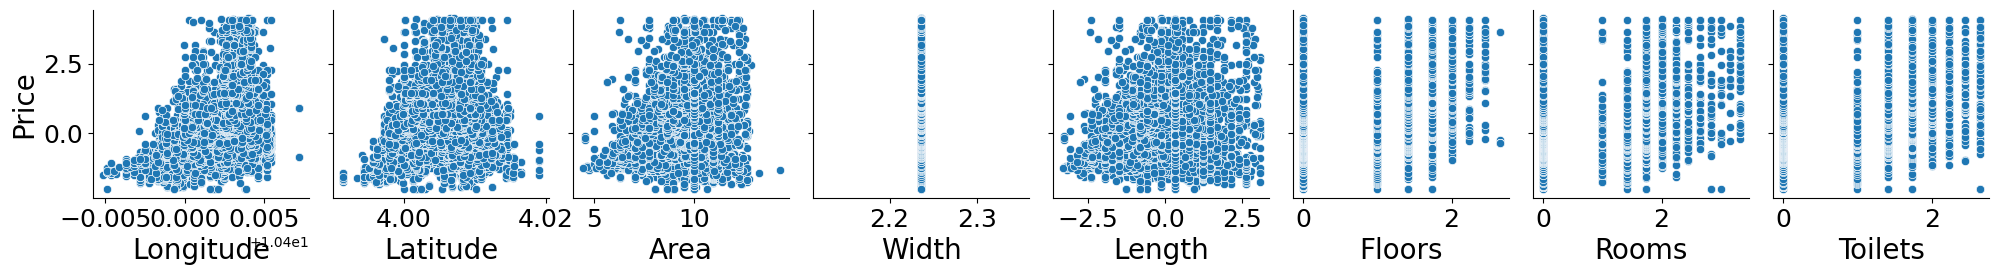

In [4]:
features = ["Longitude", "Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets"]

pairplt_trans = sns.pairplot(df, x_vars=features, y_vars=["Price"])

for ax in pairplt_trans.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18) 

plt.show()

#### Comment
 - In the graph `Price & Area`, the points have a slight upward trend in distribution (positive correlation). 
 - The remaining features have a clear scatter distribution. 
 - There are some features that are concentrated at certain points
#### Conclusion
 - Weak correlation: Only `Price` and `Area` have a slight increasing trend, indicating that there may be a weak positive correlation.
 - Other variables have no clear correlation: `Longitude, Latitude, Width, Length` have no specific pattern, and are distributed quite randomly.
 - There are clusters of data at some points: Some variables have concentrated points, possibly because the data is limited to some ranges or is influenced by other factors such as location, property type.

#### Using HeatMap to Represent Correlation of Input Variable Pairs

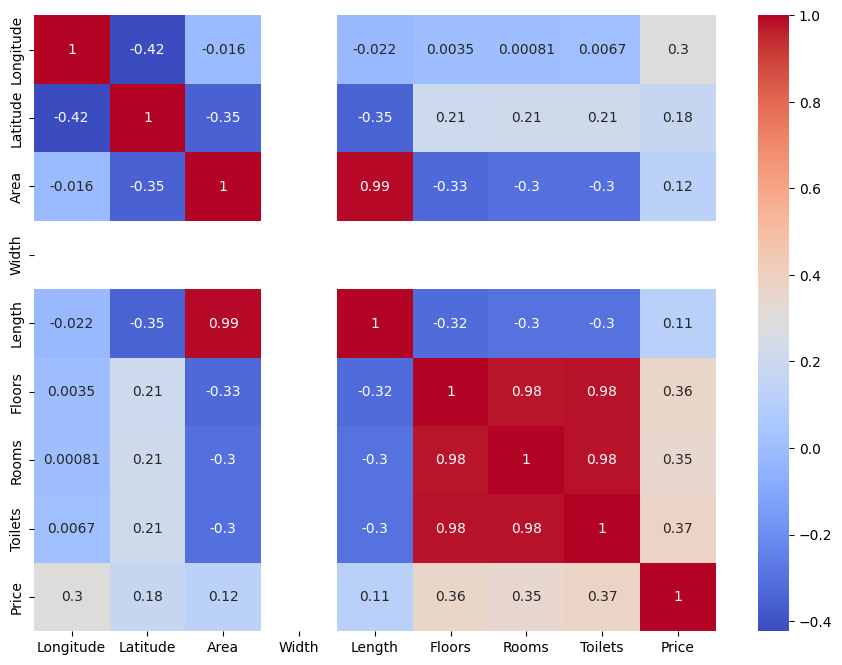

In [5]:
cols_to_include = ["Longitude", "Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets", "Price"]
plt.figure(figsize=(11, 8))
sns.heatmap(df[cols_to_include].corr(), annot=True, cmap="coolwarm")

plt.show()

#### Using ScatterPlot to represent the relationship between 2 variables `Length` and `Area`

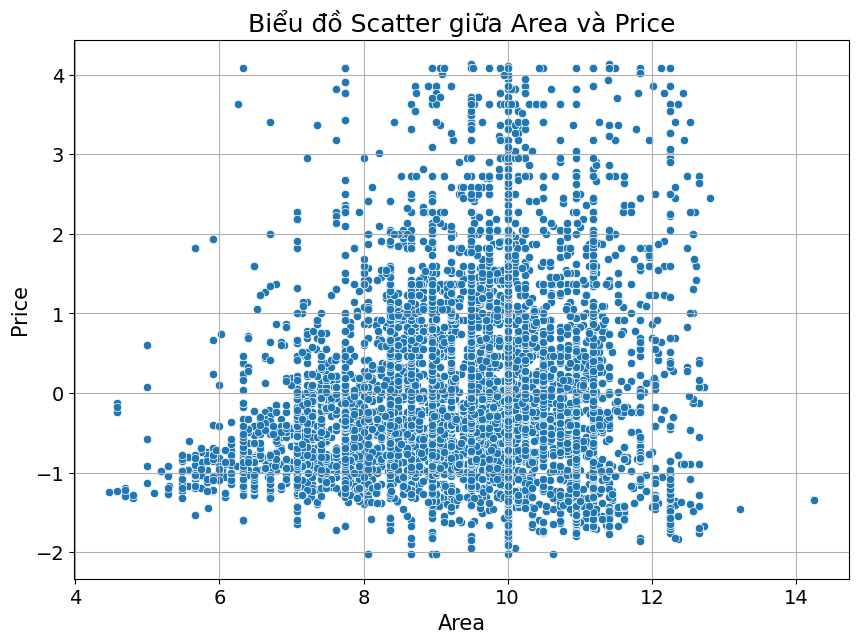

In [6]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title('Biểu đồ Scatter giữa Area và Price', fontsize=18)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

#### Comments
 - Based on the two graphs above, we see that the input variables are almost independent and do not depend on each other. Only the variables Length and Area have the most obvious correlation with each other (>0.8) according to Heatmap. 
 - At the same time, through ScatterPlot, the points tend to be distributed in an upward straight line (positive correlation).
#### Conclusion
It can be said that the higher the Length value, the larger the Area value and vice versa. 
In the future, one of these two variables can be eliminated to reduce overfitting of the model

### Statistical methods
#### Univariate feature selection

In [7]:
selector_best = SelectKBest(score_func=mutual_info_regression, k=12)
X_kbest = selector_best.fit_transform(X, y)
selected_features = X.columns[selector_best.get_support()]
scores = selector_best.scores_

sorted_indices = np.argsort(scores)[::-1]

print("Selected features in order from best to worst:")
for index in sorted_indices:
  print(f"{selected_features[index]}: {scores[index]}")

c:\Users\DUC VAN\miniconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=12 is greater than n_features=8. All the features will be returned.
  warnings.warn(


Selected features in order from best to worst:
Longitude: 1.2025126041376417
Latitude: 1.1858444756187554
Area: 0.467666689389552
Length: 0.4210185875713064
Toilets: 0.2086033900327382
Floors: 0.1973301712773785
Rooms: 0.19325427632533554
Width: 0.0009336386632177174


##### Conclusion:
For statistical methods, by using the application of univariate statistical testing, it is possible to arrange the order of variables from most important to least important. The Longitude variable is considered the most important variable among the input variables.


### Recursive feature elimination
#### Recursive feature elimination with cross-validation

In [8]:
min_features_to_select = 1
regressor = LinearRegression()

cv = KFold(n_splits=5)

rfecv = RFECV(
    estimator=regressor,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")
selected_features = X.columns[rfecv.support_]
print("Selected features:", selected_features)

Optimal number of features: 8
Selected features: Index(['Longitude', 'Latitude', 'Area', 'Width', 'Length', 'Floors', 'Rooms',
       'Toilets'],
      dtype='object')


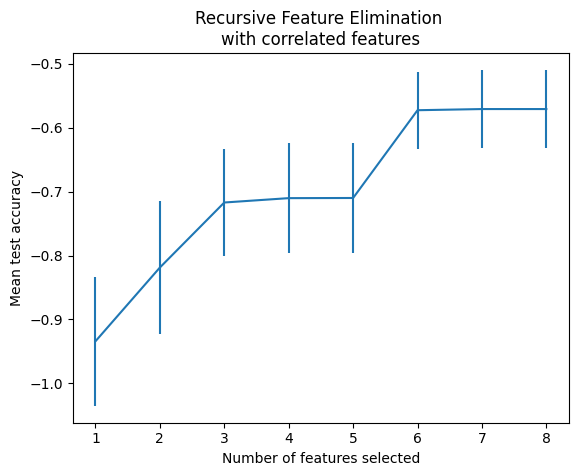

In [9]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

### Conclusion

#### Comments on the results

- Optimal number of features: 8. The results show that the model performs best when keeping all 8 features. That is, removing any of these 8 columns causes the model to degrade (higher MSE).

- Selected features: `Longitude`, `Latitude`, `Area`, `Length`, `Floors`, `Toilets`. These are the 8 selected features. If X initially has exactly these 8 columns, it proves that all are important for prediction. If X has more columns, then the results show that these 8 columns are the best according to the neg_mean_squared_error criterion.

#### From the graph

- The curve (mean_test_score) shows how the model improves or deteriorates when the number of features is gradually reduced.
- The error bars (yerr) show the variation over the cross-validation runs.

- The highest point of the curve corresponds to the selection of 8 features.

#### Conclusion
- The LinearRegression model with the above 8 features is the most optimal according to the MSE evaluation during the recursive feature elimination (RFECV) process.

- If your goal is to optimize the number of features (feature selection), the results show that keeping 8 features is the best performance.

- In case you expect to remove some features while maintaining the same performance, this result shows that the model probably needs all 8 columns to perform well.